## Import các thư viện và module cần thiết

In [ ]:
#!pip install --upgrade opencv-python

In [ ]:
# pip install opencv-contrib-python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls('/content/drive/My Drive/Colab NoteBooks')

/bin/bash: -c: line 0: syntax error near unexpected token `'/content/drive/My Drive/Colab NoteBooks''
/bin/bash: -c: line 0: `ls('/content/drive/My Drive/Colab NoteBooks')'


In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os
import math
os.getcwdb()
os.chdir("/content/drive/My Drive/SOCOFing")

## Khởi tạo ảnh mẫu và các biến lưu trữ

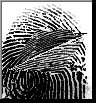

In [ ]:
# Khởi tạo ảnh mẫu
original = cv2.imread("./Altered/Altered-Hard/1__M_Right_index_finger_Zcut.BMP")
cv2_imshow(original)

# Khởi tạo các biến lưu trữ
best_match = 0
filename = None
image = None
kp1 = kp2 = sp = None

## Đối chiếu ảnh mẫu với dữ liệu và tìm ra ảnh tương đồng trong dữ liệu

In [ ]:
for file in [file for file in os.listdir("./Real")]:
    
    # Đọc các ảnh vân tay từ data
    fingerprint_data_image = cv2.imread("./Real/" +file)

    # Sử dụng thuật toán Scale-Invariant Feature Transform
    sift = cv2.SIFT_create()
    
    # - Trích xuất điểm chính : những điểm đặc biệt cụ thể trên ảnh và những mô tả
    # - Trích xuất ảnh mẫu
    kp_1, descript_1 = sift.detectAndCompute(original, None)
    # - Trích xuất ảnh từ data
    kp_2, descript_2 = sift.detectAndCompute(fingerprint_data_image, None)

    # So khớp điểm đặc trưng với nhau dựa trên thuật toán FlannBasedMatcher
    # Chọn thuật kd tree, với tree = 10 
    # Tạo 1 Dictonary gồm key-value với knnMatch để lưu trữ keypoint và descript.
    # Chọn k = 2 (với 2 kearest neighbors )
    match = cv2.FlannBasedMatcher(dict(algorithm=1, trees=10), 
          dict()).knnMatch(descript_1, descript_2, k=2)

    # Tìm các điểm giống nhau giữa 2 ảnh
    # Đặt ra 1 ngưỡng để so sánh
    same_points = [p for (p, q) in match if p.distance < 0.1*q.distance]

    # Tạo keypoint mới với số lượng keypoint nhỏ nhất giữa 2 keypoint
    kp = min(len(kp_1),len(kp_2))

    # Nếu độ dài của điểm giống nhau chia cho điểm chính lớn hơn điểm tối đa thì ta sẽ nói 2 ảnh trùng khớp
    # Lấy tên ảnh, keypoint và các điểm giống nhau của ảnh tương đồng với ảnh mẫu
    if len(same_points) / kp * 100 > best_match:
        best_match = len(same_points) / kp * 100
        filename = file
        image = fingerprint_data_image
        kp1,kp2,sp = kp_1, kp_2, same_points


## Kết quả đạt được

Best Match:  1__M_Right_index_finger.BMP
Score: 48.529411764705884
10607.836468446601 % MSE: 
7.874535448862742 % PSNR: 


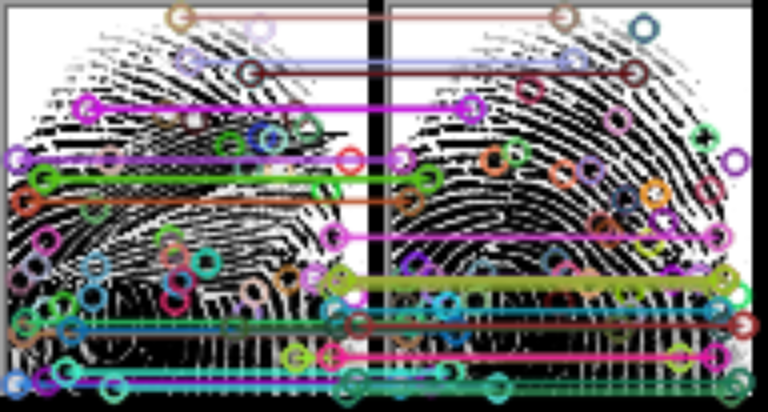

In [ ]:
# Kết quả thực hiện
# Sử dụng thuật toán MSE và PSNR để so sánh độ tương đồng giữa 2 ảnh
def mse(imgA, imgB):
	err = np.sum((imgA.astype("float") - imgB.astype("float")) ** 2)
	err = err / float(imgA.shape[0] * imgA.shape[1])
	return err

def PSNR(imgA, imgB):
    m = mse(imgA, imgB)
    if(m == 0):
        return 100
    PIXEL_MAX = 255.0
    psnr = 20 * math.log10(PIXEL_MAX / math.sqrt(m))
    return psnr

print("Best Match: ", filename)
print("Score: " + str(best_match))
print("{0} % MSE: ".format(mse(original, image)))
print("{0} % PSNR: ".format(PSNR(original, image)))
out = cv2.drawMatches(original, kp1, image, 
                        kp2, sp, None) 
out = cv2.resize(out, None, fx=4, fy=4)
cv2_imshow(out)